<a href="https://colab.research.google.com/github/Shruti100-hub/Shruti-Jain/blob/main/shruti_jain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report
import re
import string
from wordcloud import WordCloud
from tensorflow.keras.layers import LSTM

In [ ]:
import pandas as pd
data_Fake = pd.read_csv('/content/Fake.csv')
data_True = pd.read_csv('/content/True.csv')

In [ ]:
data_Fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_True.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
data_Fake['class']=0
data_True['class']=1

In [ ]:
data_Fake.shape,data_True.shape

((19015, 5), (21417, 5))

In [ ]:
data_Fake_manual_testing = data_Fake.tail(10).copy()
for i in range(23480,23470,-1):
      data_Fake.drop(data_Fake.tail(10).index, inplace=True)

data_True_manual_testing = data_True.tail(10).copy()
for i in range(21416,21406,-1):
        data_True.drop(data_True.tail(10).index, inplace=True)

In [ ]:
data_Fake.shape, data_True.shape

((18915, 5), (21317, 5))

In [ ]:
data_Fake_manual_testing['class']=0
data_True_manual_testing['class']=1

In [ ]:
data_Fake_manual_testing.head(10)

,title,text,subject,date,class
19005,BOOM! Hey Democrats….Why The Violent Riots? YO...,Watch:You want a #JobsReport?Here's a jobs rep...,left-news,"Mar 10, 2017",0
19006,MIKE HUCKABEE SCORCHES THE PRESS: “Grow up!…St...,,left-news,"Mar 10, 2017",0
19007,COLLEGE STUDENTS Who Wanted You To Pay For The...,When you consider the stunning ways students a...,left-news,"Mar 9, 2017",0
19008,OUCH! Things Take Ugly Turn For MATT LAUER Whe...,"Matt Lauer, of the failing Today Show had an e...",left-news,"Mar 9, 2017",0
19009,JUDGE NAPOLITANO: Samsung Allowed British Inte...,.@Judgenap: Samsung allowed British intelligen...,left-news,"Mar 9, 2017",0
19010,BREAKING! Refugee Terrorist Coverup: Obama’s D...,Federal lawmakers are investigating how a form...,left-news,"Mar 9, 2017",0
19011,IRONY ALERT! DC’S DAY WITHOUT WOMEN Literally ...,We hope these women realize they were being us...,left-news,"Mar 8, 2017",0
19012,LOL! LIBERAL OHIO ACTIVIST GOES TO JAIL For 13...,A court in Ohio sentenced an environmental act...,left-news,"Mar 8, 2017",0
19013,CNN Anchor Asks Van Jones To Take Back His Pra...,CNN commentator Van Jones stood by his praise ...,left-news,"Mar 8, 2017",0
19014,LOUD,NaN,NaN,NaN,0


In [ ]:
data_True_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [ ]:
data_merge = pd.concat([data_Fake , data_True] , axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [ ]:
data = data_merge.drop(['title','subject' ,'date' ], axis = 1)

In [ ]:
data_Fake['subject'].value_counts()

,count
subject,
News,9050
politics,6841
Government News,1570
left-news,1454


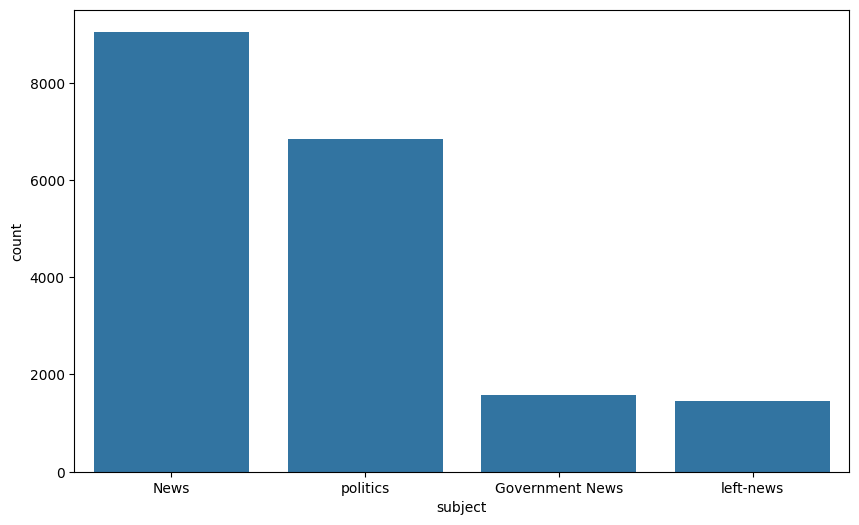

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='subject', data=data_Fake)
plt.show()

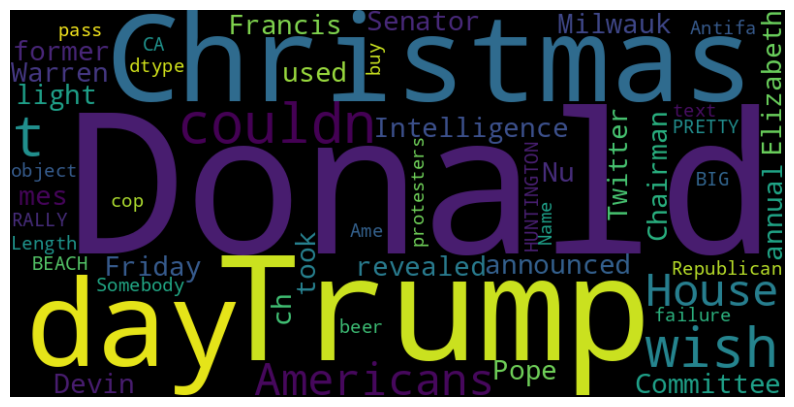

In [ ]:
wordcloud = WordCloud(width=800, height=400).generate(str(data_Fake['text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
data.isnull().sum()

,0
text,0
class,0


In [ ]:
data = data.sample(frac = 1)

In [ ]:
data.head()

,text,class
11319,,0
2370,"Reince Priebus, Donald Trump s chief of staff,...",0
6640,A little-noticed detail in the 1993 biography ...,0
8540,WASHINGTON (Reuters) - The Obama administratio...,1
4127,WASHINGTON (Reuters) - President Donald Trump ...,1


In [ ]:
data.reset_index(inplace = True)
data.drop(['index'] , axis = 1 ,inplace = True)

In [ ]:
data.columns

Index(['text', 'class'], dtype='object')

In [ ]:
data.head()

,text,class
0,,0
1,"Reince Priebus, Donald Trump s chief of staff,...",0
2,A little-noticed detail in the 1993 biography ...,0
3,WASHINGTON (Reuters) - The Obama administratio...,1
4,WASHINGTON (Reuters) - President Donald Trump ...,1


In [ ]:
def wordopt(text):
    text = text.lower()
    text =  re.sub('\[.*?\]' ,'',text)
    text = re.sub ("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [ ]:
data['text'] = data['text'].apply(wordopt)

In [ ]:
x = data['text']
y = data['class']

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y, test_size = 0.05)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.fit_transform(x_test)

In [ ]:

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train , y_train)

LogisticRegression()

In [ ]:
pred_lr = LR.predict(xv_train)

In [ ]:
LR.score(xv_train , y_train)

0.9912611198325484

In [ ]:
print(classification_report(y_train , pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17946
           1       0.99      0.99      0.99     20274

    accuracy                           0.99     38220
   macro avg       0.99      0.99      0.99     38220
weighted avg       0.99      0.99      0.99     38220



In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(xv_train , y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_train)

In [ ]:
DT.score(xv_train , y_train)

0.9999738356881214

In [ ]:
print(classification_report(y_train , pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17946
           1       0.99      0.99      0.99     20274

    accuracy                           0.99     38220
   macro avg       0.99      0.99      0.99     38220
weighted avg       0.99      0.99      0.99     38220



In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train , y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rf = RF.predict(xv_train)

In [ ]:
RF.score(xv_train , y_train)


0.9999738356881214

In [ ]:
print(classification_report(y_train , pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17946
           1       0.99      0.99      0.99     20274

    accuracy                           0.99     38220
   macro avg       0.99      0.99      0.99     38220
weighted avg       0.99      0.99      0.99     38220



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
GB = GradientBoostingClassifier()
GB.fit(xv_train, y_train)

pred_gb = GB.predict(xv_train)

print(GB.score(xv_train, y_train))
print(classification_report(y_train, pred_gb))


0.9973050758765044
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17946
           1       1.00      1.00      1.00     20274

    accuracy                           1.00     38220
   macro avg       1.00      1.00      1.00     38220
weighted avg       1.00      1.00      1.00     38220



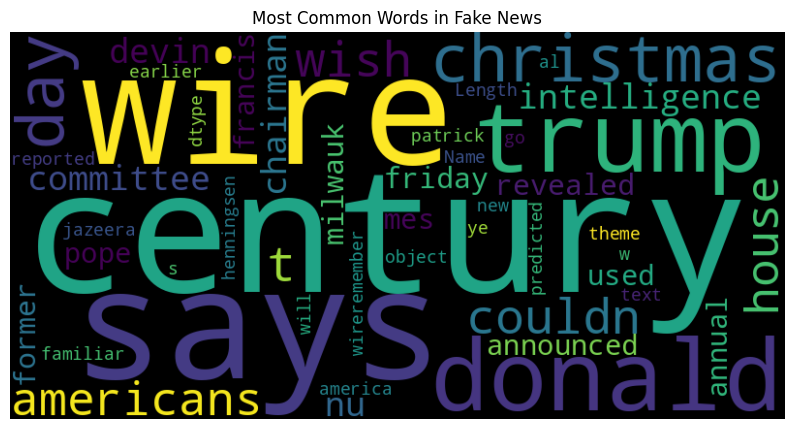


----- Logistic Regression Model -----
Accuracy: 0.9870
Precision: 0.9829
Recall: 0.9900
F1-score: 0.9864

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4696
           1       0.98      0.99      0.99      4284

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



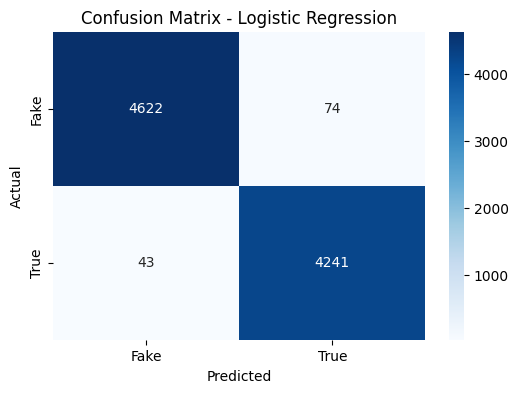


----- Decision Tree Model -----
Accuracy: 0.9958
Precision: 0.9972
Recall: 0.9939
F1-score: 0.9956

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      4696
           1       1.00      0.99      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



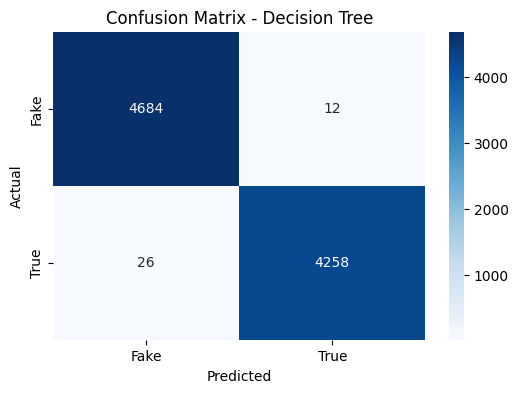


----- Random Forest Model -----
Accuracy: 0.9980
Precision: 0.9988
Recall: 0.9970
F1-score: 0.9979

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



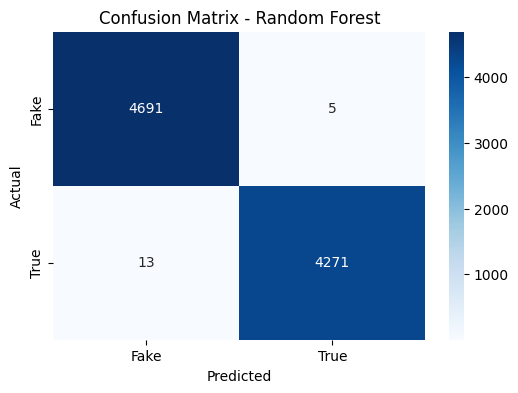


----- Gradient Boosting Model -----
Accuracy: 0.9965
Precision: 0.9956
Recall: 0.9972
F1-score: 0.9964

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4696
           1       1.00      1.00      1.00      4284

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



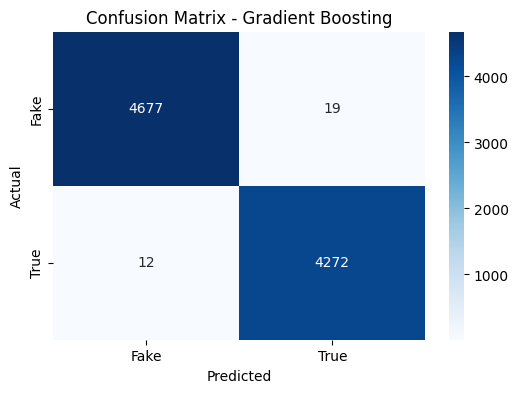

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

data_Fake = pd.read_csv('/content/Fake.csv')
data_True = pd.read_csv('/content/True.csv')

data_Fake['class'] = 0
data_True['class'] = 1

data = pd.concat([data_Fake, data_True], axis=0)
data = data.drop(columns=['title', 'subject', 'date'])

data.reset_index(drop=True, inplace=True)

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

data['text'] = data['text'].apply(clean_text)

wordcloud = WordCloud(width=800, height=400).generate(str(data[data['class'] == 0]['text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Fake News")
plt.show()

X = data['text']
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

for name, model in models.items():
    print(f"\n----- {name} Model -----")
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'True'], yticklabels=['Fake', 'True'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


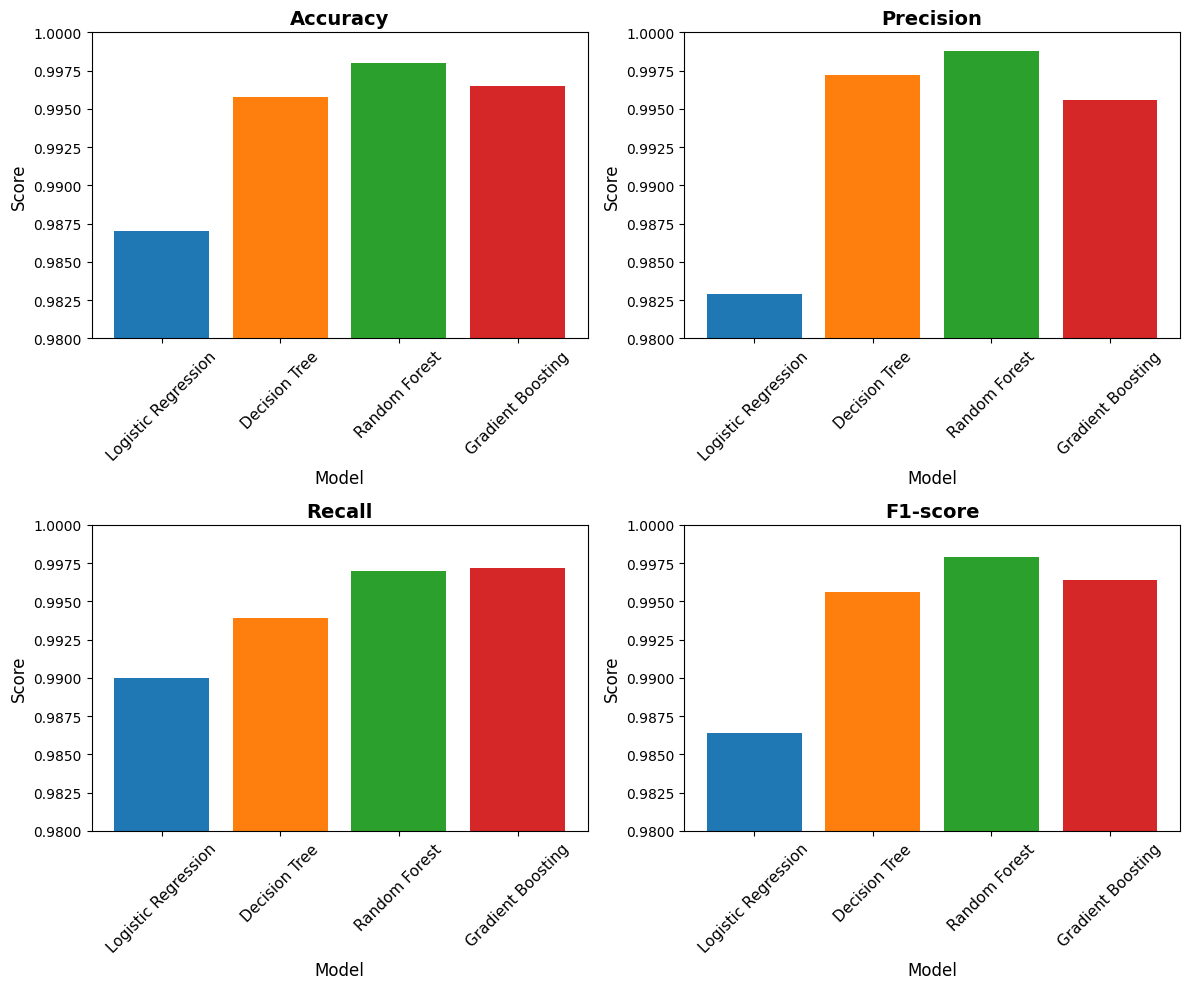

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
accuracy = [0.9870, 0.9958, 0.9980, 0.9965]
precision = [0.9829, 0.9972, 0.9988, 0.9956]
recall = [0.9900, 0.9939, 0.9970, 0.9972]
f1_score = [0.9864, 0.9956, 0.9979, 0.9964]

metrics = [accuracy, precision, recall, f1_score]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']

x = np.arange(len(models))

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, ax in enumerate(axes.flatten()):
    ax.bar(x, metrics[i], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    ax.set_title(metric_names[i], fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, fontsize=11)
    ax.set_ylim(0.98, 1)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_xlabel('Model', fontsize=12)

fig.tight_layout()
plt.show()
